In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import time
import statistics
from scipy.stats import norm


In [146]:
df = pd.read_csv('https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv', sep=';', header=None)
df.columns = df.iloc[0]
df=df.drop(df.index[0])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

In [147]:
counts = []

for i in df.columns:
    counts.append(df[i].value_counts())

Five Features:
Passasjerer_ombord, Fylke, Linjetype, Linjeretning, område


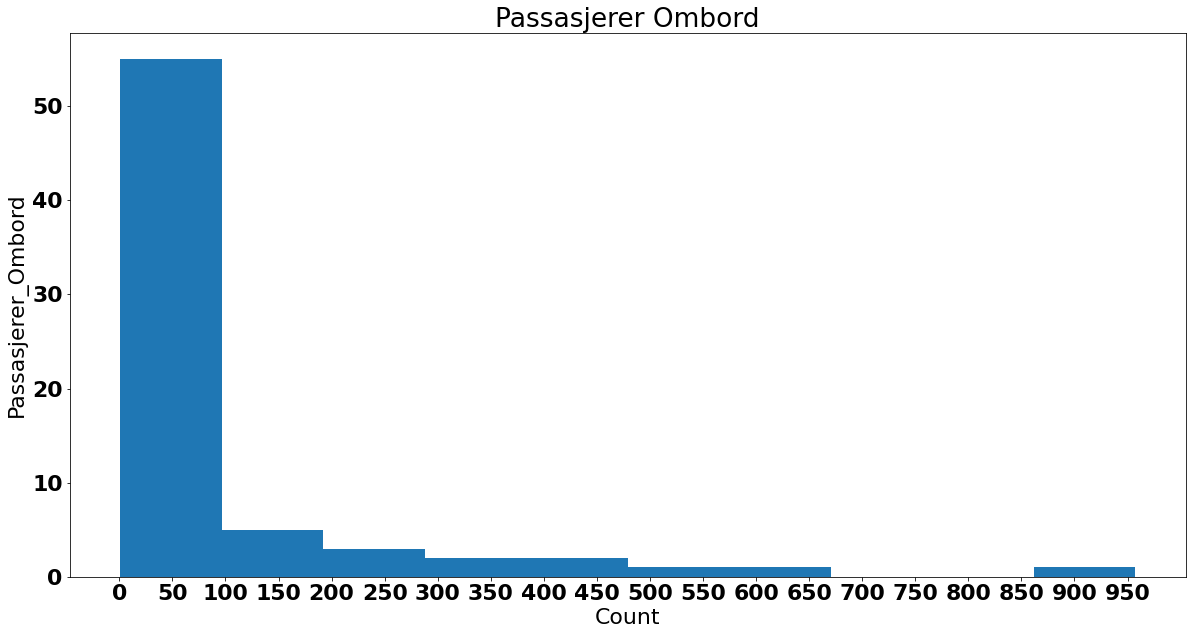

In [148]:
Passasjerer_Ombord = counts[-1]

Xticks = [x*50 for x in range(20)]


plt.figure(figsize=(20, 10))
plt.hist(x=Passasjerer_Ombord)
plt.xlabel('Count')
plt.title('Passasjerer Ombord')
plt.xticks(Xticks)
plt.ylabel('Passasjerer_Ombord')
plt.rc('font')
plt.show()

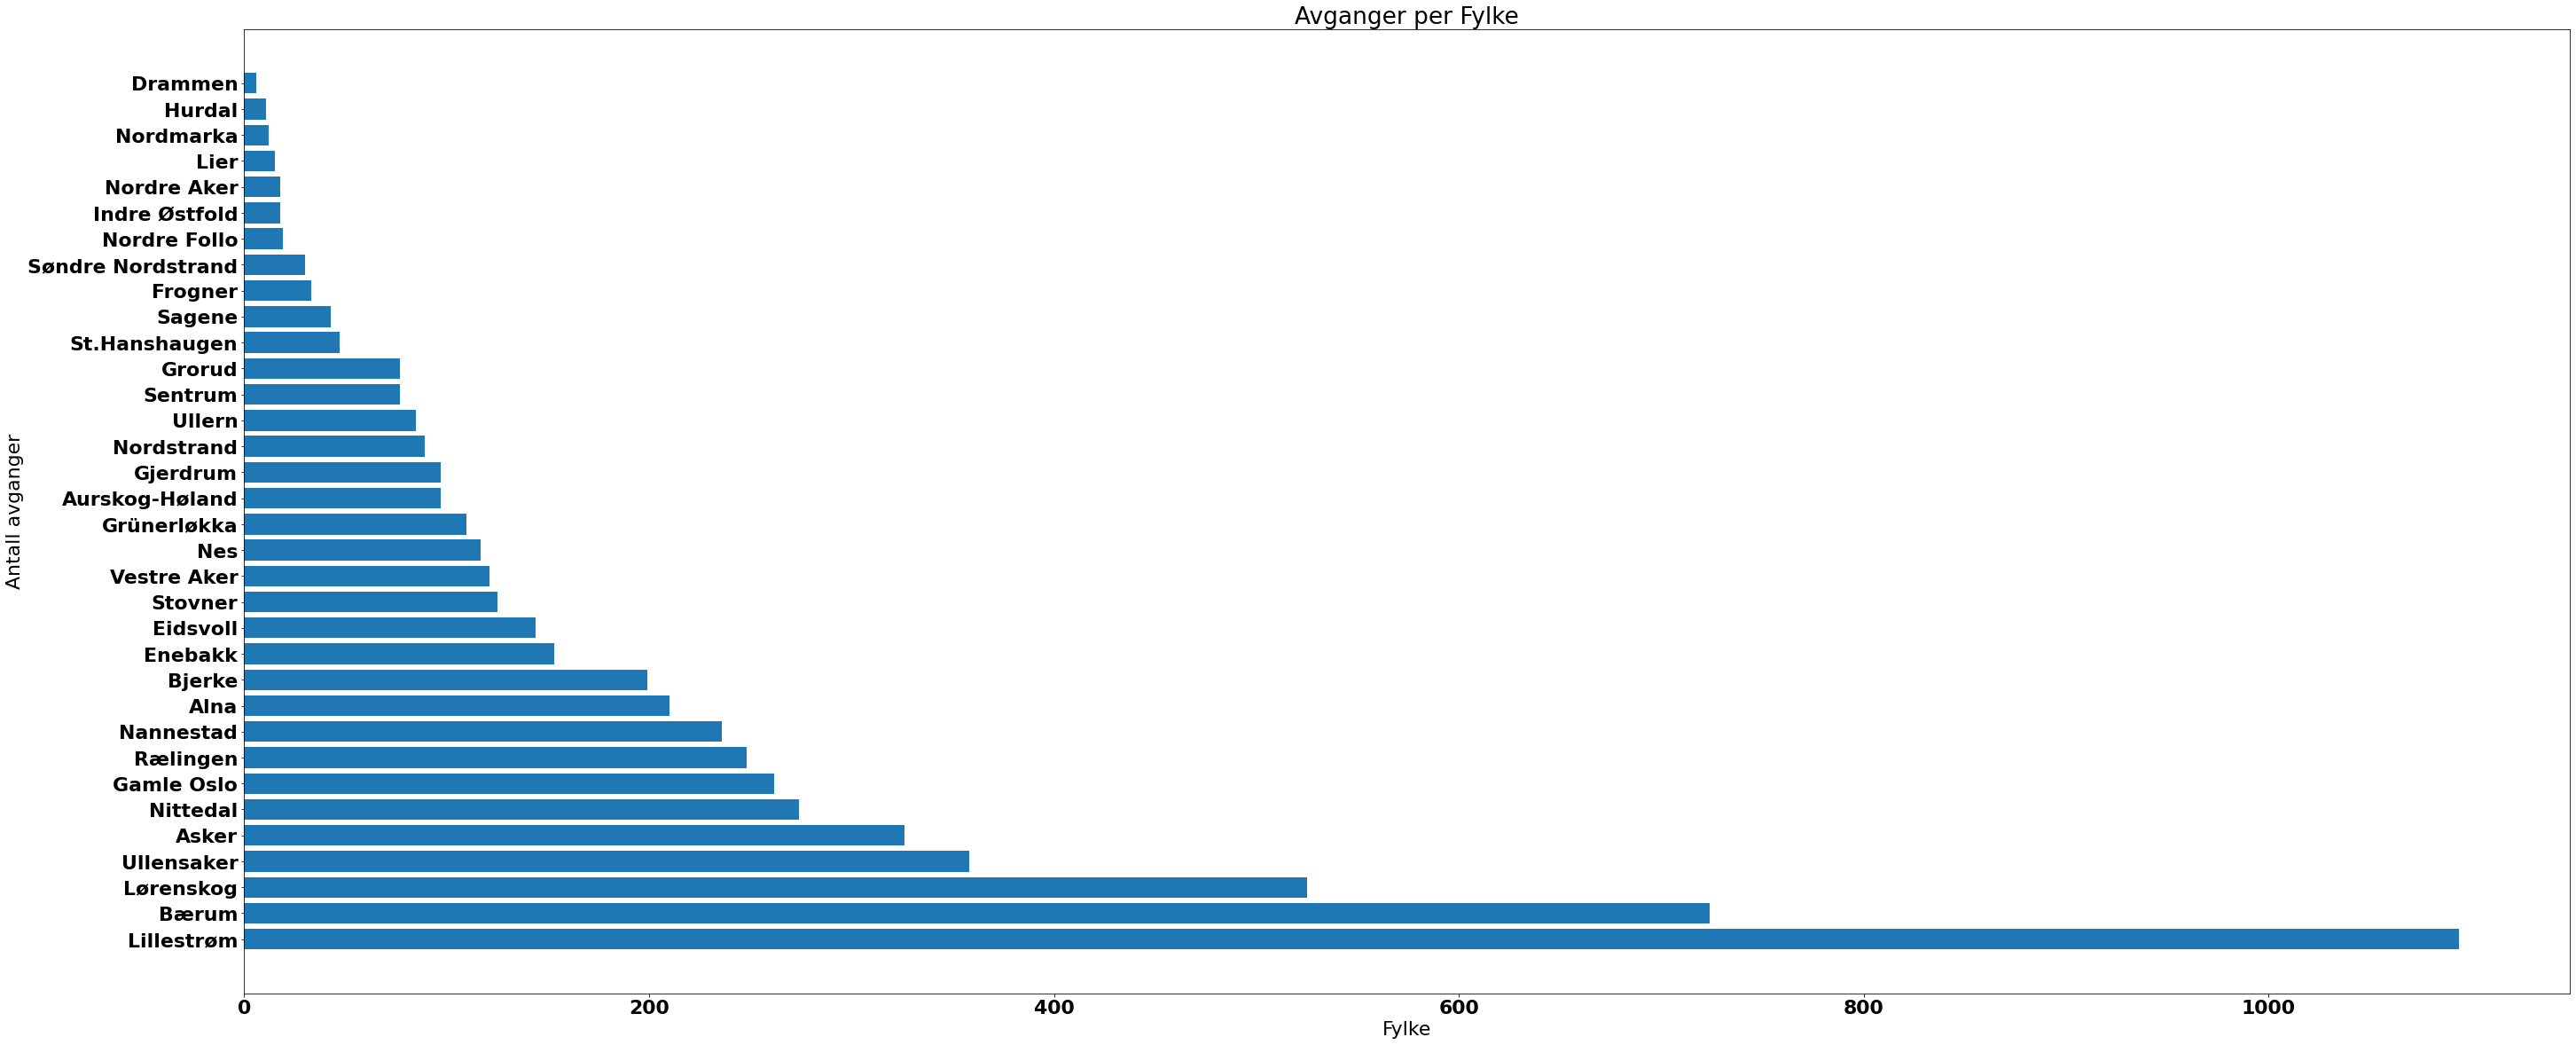

In [149]:
fylke = counts[4]
fylke_counts = [x for x in fylke]


plt.figure(figsize=(47, 20))
plt.barh(width=fylke_counts, y=fylke.index)
plt.title('Avganger per Fylke')
plt.xlabel('Fylke')
plt.ylabel('Antall avganger')
plt.rc('font', **font)
plt.show()

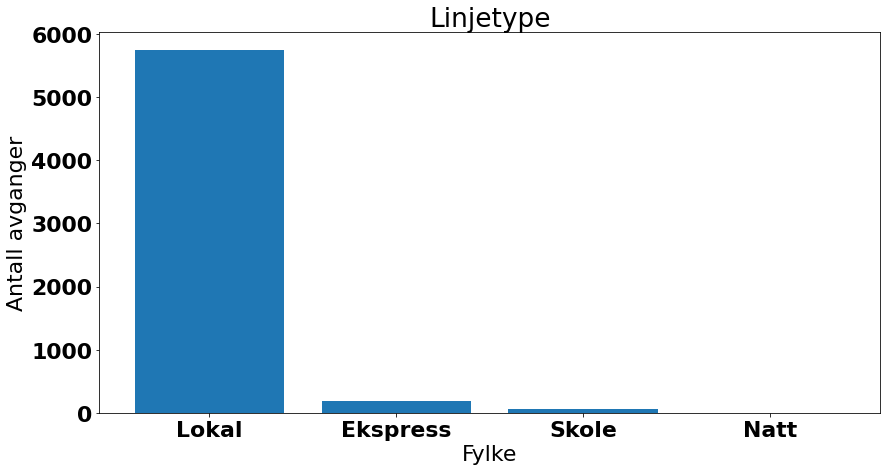

In [150]:
linjetype = counts[7]
linjetype_counts = [x for x in linjetype]



plt.figure(figsize=(14, 7))
plt.bar(height=linjetype_counts, x=linjetype.index)
plt.title('Linjetype')
plt.xlabel('Fylke')
plt.ylabel('Antall avganger')
plt.rc('font', **font)
plt.show()

In [151]:
holdeplass_fra = counts[6]
holdeplass_til = counts[7]

In [152]:
df["Holdeplass_Fra_Til"] = df['Holdeplass_Fra'] + '_' + df['Holdeplass_Til']

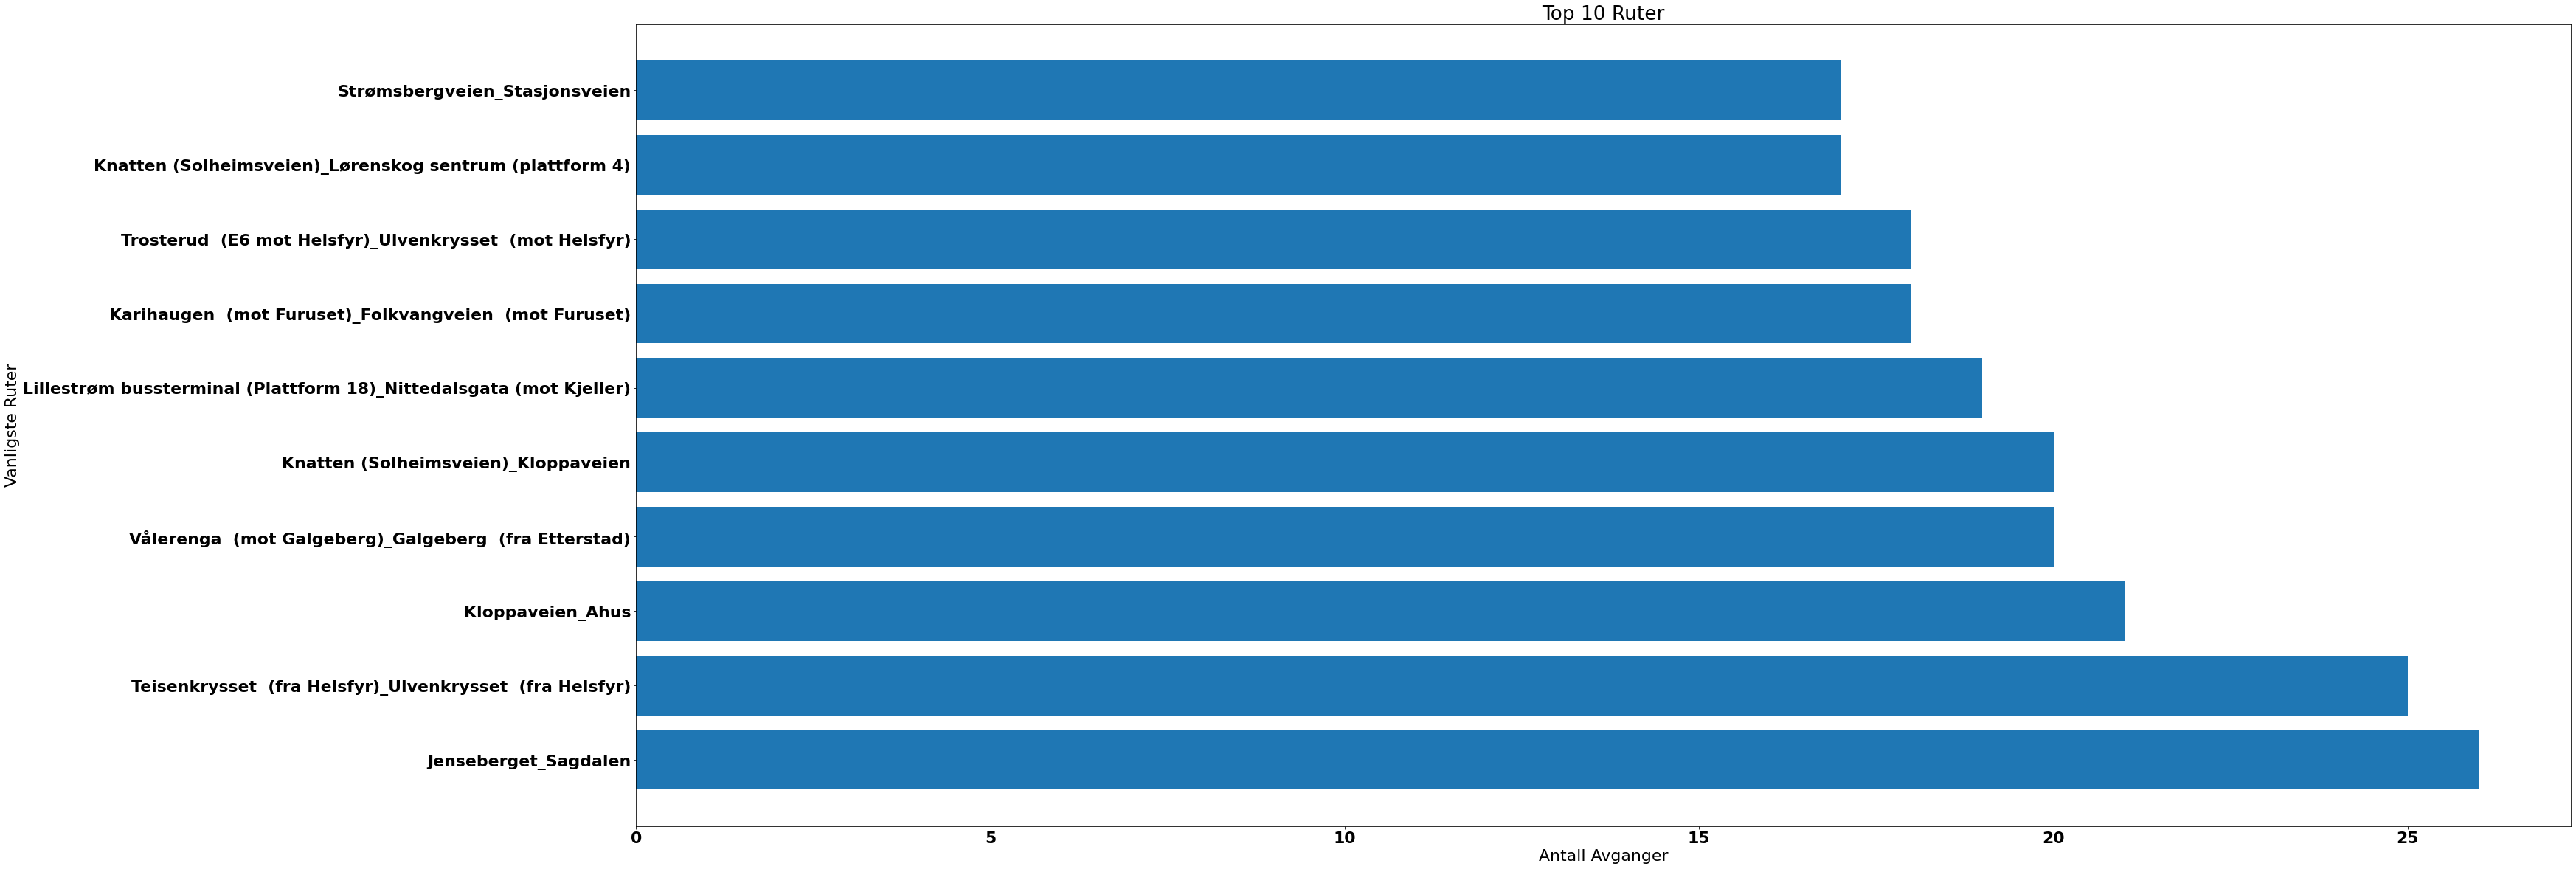

In [153]:
vanligste_holdeplasser = df["Holdeplass_Fra_Til"].value_counts()
vanligste_holdeplasser_counts = [x for x in vanligste_holdeplasser]



plt.figure(figsize=(47, 20))
plt.barh(width=vanligste_holdeplasser_counts[0:10], y=vanligste_holdeplasser[0:10].index)
plt.title('Top 10 Ruter')
plt.xlabel('Antall Avganger')
plt.ylabel('Vanligste Ruter')
plt.rc('font', **font)
plt.show()

In [154]:
faktisk_avgang = df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']
planlagt_avgang = df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']


In [155]:
time = planlagt_avgang.iloc[0]
def as_seconds(time):
    try:
        timer = int(float(time[0:2]))
        minutter = int(float(time[3:5]))
        sekunder = int(float(time[6:8]))
        
        return timer*60*60+minutter*60+sekunder
    except:
        return 0


In [156]:
def sekunder_forskjell(time1, time2):
    time1sec = as_seconds(time1)
    time2sec = as_seconds(time2)
    return time2sec-time1sec

In [191]:
tidsforskjell = []
for i in range(faktisk_avgang.size):
    tids_error = sekunder_forskjell(planlagt_avgang.iloc[i], faktisk_avgang.iloc[i])
    if tids_error >-2000 and tids_error < 2000:
        tidsforskjell.append(tids_error) 

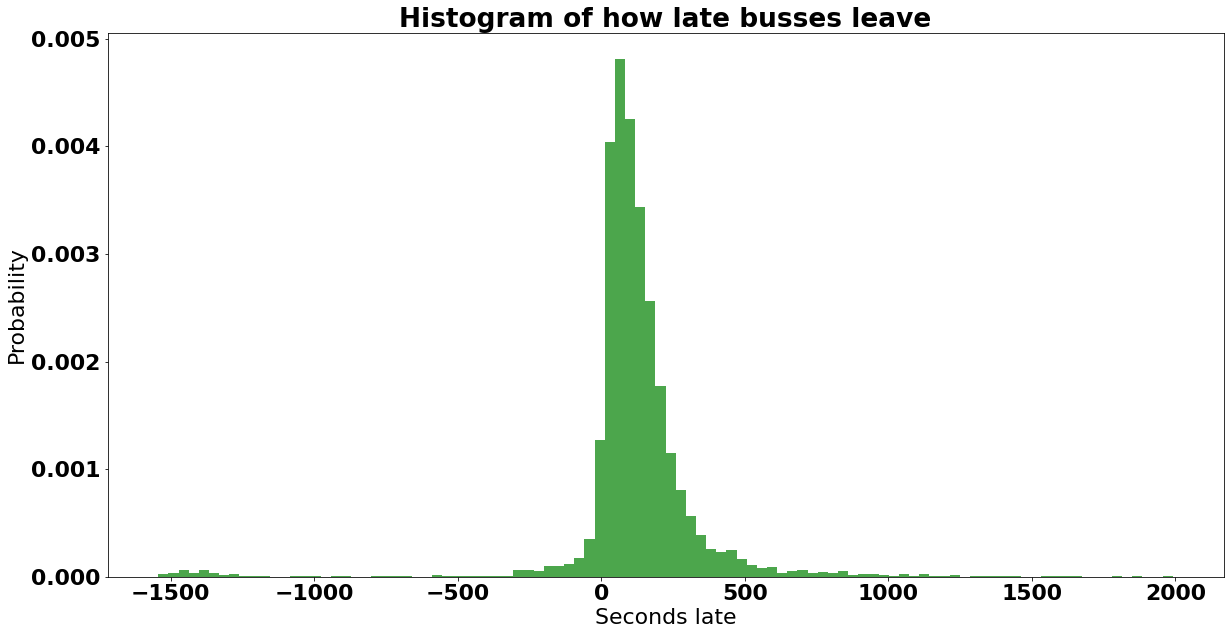

In [192]:
plt.figure(figsize=(20, 10))
 
n, bins, patches = plt.hist(tidsforskjell, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
   


plt.xlabel('Seconds late')
plt.ylabel('Probability')
  
plt.title('Histogram of how late busses leave',
          fontweight ="bold")
  
plt.show()